Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1936, 2584, 3)


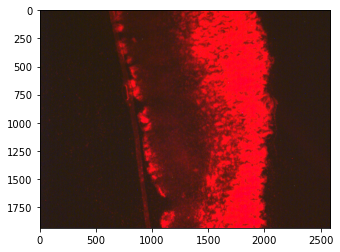

In [3]:
#Importing original CZI file and plotting using matplotlib
import matplotlib.pyplot as plt
import czifile

img = czifile.imread("C:\\Users\\Akanksha\\Desktop\\czi\\Snap-10192.czi")

#Shape of image data
print(img.shape)

#extract relevant pixels
img1=img[0, :, :, :]

import matplotlib.pyplot as plt
plt.imshow(img1, cmap='hot')

PNG
RGBA
(340, 252)
PNG
None


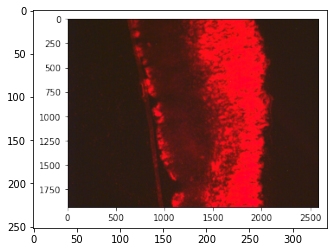

In [7]:
#Importing the converted PNG file and checking details of the PNG file
from PIL import Image
img = Image.open('C://Users//Akanksha//Desktop//czi//png-10192.png')
#read image
plt.imshow(img)

# prints details of the image
print(img.mode)
print(img.size)
print(img.format)
print(img.palette) 

In [10]:
#Converting PNG image to greyscale . Only to be done if required. 
import os
os.getcwd()
greyscale_image = img.convert('L')
greyscale_image.save('greyscale_image_10192.jpg')

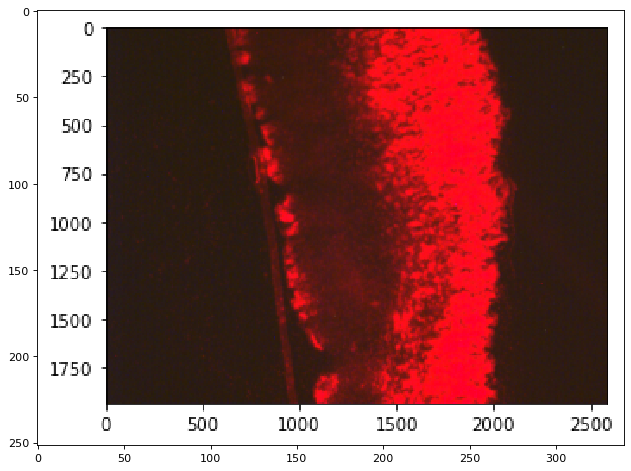

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from numpy import ndarray
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
image = imread('C://Users//Akanksha//Desktop//czi//png-10192.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(image)

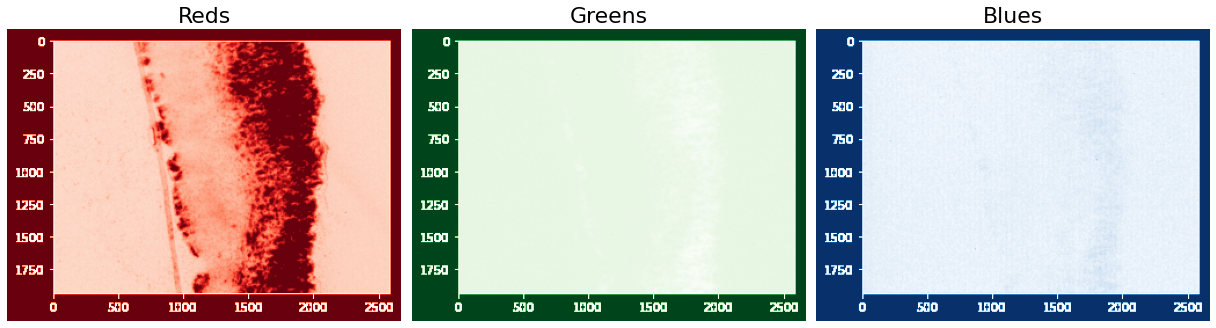

In [16]:
#Splitting image into RGB Channels
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(17,7), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 22)
        ax[i].axis('off')
    fig.tight_layout()
rgb_splitter(image)

In [17]:
#Step 1 - Extracting Red channel as a seperate image and saving it locally
#Gives black background
import cv2
 
#read image
src = cv2.imread('C://Users//Akanksha//Desktop//czi//png-10192.png', cv2.IMREAD_UNCHANGED)
print(src.shape)

#extract red channel
red_channel = src[:,:,2]

#write red channel to greyscale image
cv2.imwrite('C://Users//Akanksha//Desktop//czi//png-10192-red-channel.png',red_channel) 

(252, 340, 4)


True

In [18]:
#Method 2 - Extracting only Red Channel values into a new image
#Gives white background
#Pulling only Red channel into a new image
import cv2
import numpy as np

#read image
src = cv2.imread('C://Users//Akanksha//Desktop//czi//png-10192.png', cv2.IMREAD_UNCHANGED)
print(src.shape)

# extract red channel
red_channel = src[:,:,2]

# create empty image with same shape as that of src image
red_img = np.zeros(src.shape)

#assign the red channel of src to empty image
red_img[:,:,3] = red_channel

#save image
cv2.imwrite('C://Users//Akanksha//Desktop//czi//png-10192-red-channel-2.png',red_img) 

(252, 340, 4)


True

In [19]:
import cv2
import numpy as np
import pandas as pd

#read image
src = cv2.imread('C://Users//Akanksha//Desktop//czi//png-10192-red-channel-2.png', cv2.IMREAD_UNCHANGED)
print(src)

names = ['x', 'y', 'z']
index = pd.MultiIndex.from_product([range(s)for s in src.shape], names=names)
df1 = pd.DataFrame({'test': src.flatten()}, index=index)['test']
df1

df2 = df1.unstack(level='x').swaplevel().sort_index()
df2.index.names = ['Index', 'i']
df2

## Converting the Nump Array of Red Channel only to Pandas DF to Excel so that we can view it with ease
df2.to_excel("C://Users//Akanksha//Desktop//czi//output-10192.xlsx") 

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]
